KNN VS DECISION TREE VS RANDOM FOREST

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"mnist_train.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


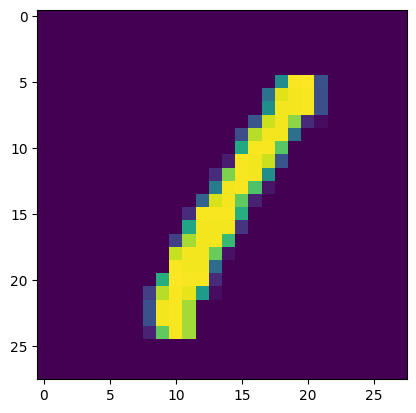

In [4]:
image0 = df.iloc[3,1:]
image0                                                
plt.imshow(np.array(image0).reshape(28,28))

In [5]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain, ytest = train_test_split(x,y,test_size =0.2,shuffle = False,random_state =7)

DECISION TREE

In [6]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()

dtree.fit(xtrain , ytrain)
ypred = dtree.predict(xtest)
from sklearn.metrics import confusion_matrix
cmdtree = confusion_matrix(ytest, ypred)
cmdtree ,dtree.score(xtest , ytest)

(array([[1088,    3,   11,   15,   11,   19,   22,    1,   19,    5],
        [   0, 1211,   13,   11,    3,    4,    5,   11,    9,    5],
        [  11,   15, 1038,   21,   11,   10,   17,   27,   32,   14],
        [  10,    8,   36, 1054,    9,   55,    2,   16,   25,   27],
        [   9,    7,    7,    7, 1028,   15,   18,   17,   21,   58],
        [  10,    8,   18,   61,   15,  896,   19,   11,   37,   22],
        [  13,    4,   13,    4,   20,   20, 1079,    0,   13,    4],
        [   2,    9,   25,   11,   10,    9,    0, 1182,   14,   35],
        [  17,   12,   32,   38,   21,   49,   18,   11,  968,   32],
        [  13,    4,    7,   25,   47,   25,    6,   39,   28,  953]]),
 0.87475)

Accuracy is nearly 87%

Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(xtrain , ytrain)


RandomForestClassifier()

0.9705833333333334

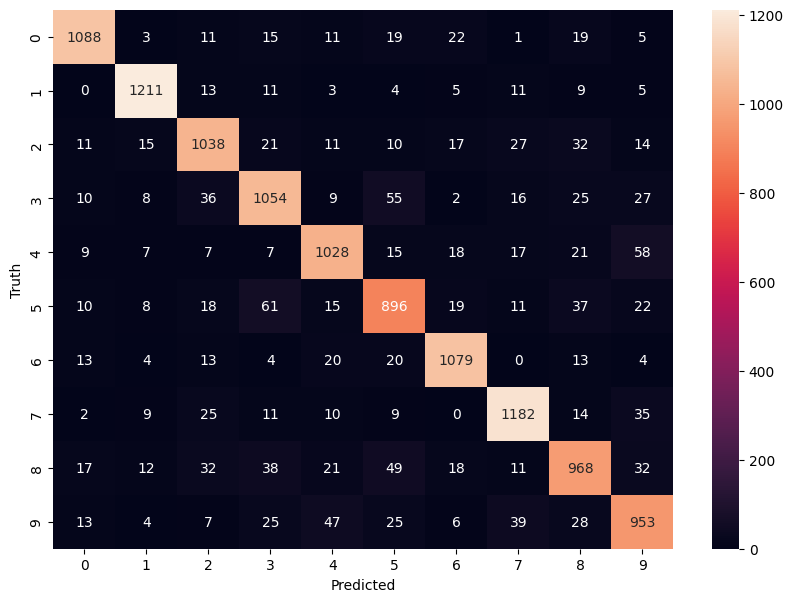

In [8]:
cmrforest = confusion_matrix(ytest , ypred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(xtest,ytest)

KNN


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain ,ytrain)
ypred = knn.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ypred,ytest)

0.9688333333333333